In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/playgolf_data.csv")

In [ ]:
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [ ]:
label_encoder = LabelEncoder()
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Wind'] = label_encoder.fit_transform(df['Wind'])
df['PlayGolf'] = label_encoder.fit_transform(df['PlayGolf'])

# Separate features and target variable
X = df.drop(columns=["PlayGolf"])
y = df["PlayGolf"]

In [ ]:
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
y_train

12    1
5     0
8     1
2     1
1     0
13    0
4     1
7     0
10    1
3     1
6     1
Name: PlayGolf, dtype: int64

In [ ]:


dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [ ]:
y_test

9     1
11    1
0     0
Name: PlayGolf, dtype: int64

In [ ]:
predictions

array([1, 1, 1])

In [ ]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,predictions)
cf

array([[0, 1],
       [0, 2]])

In [ ]:
#print("Original Labels",X_test)
#print("Labels Predicted",prediction)
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=predictions))

Train data accuracy: 1.0
Test data accuracy: 0.6666666666666666


In [ ]:
X.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')

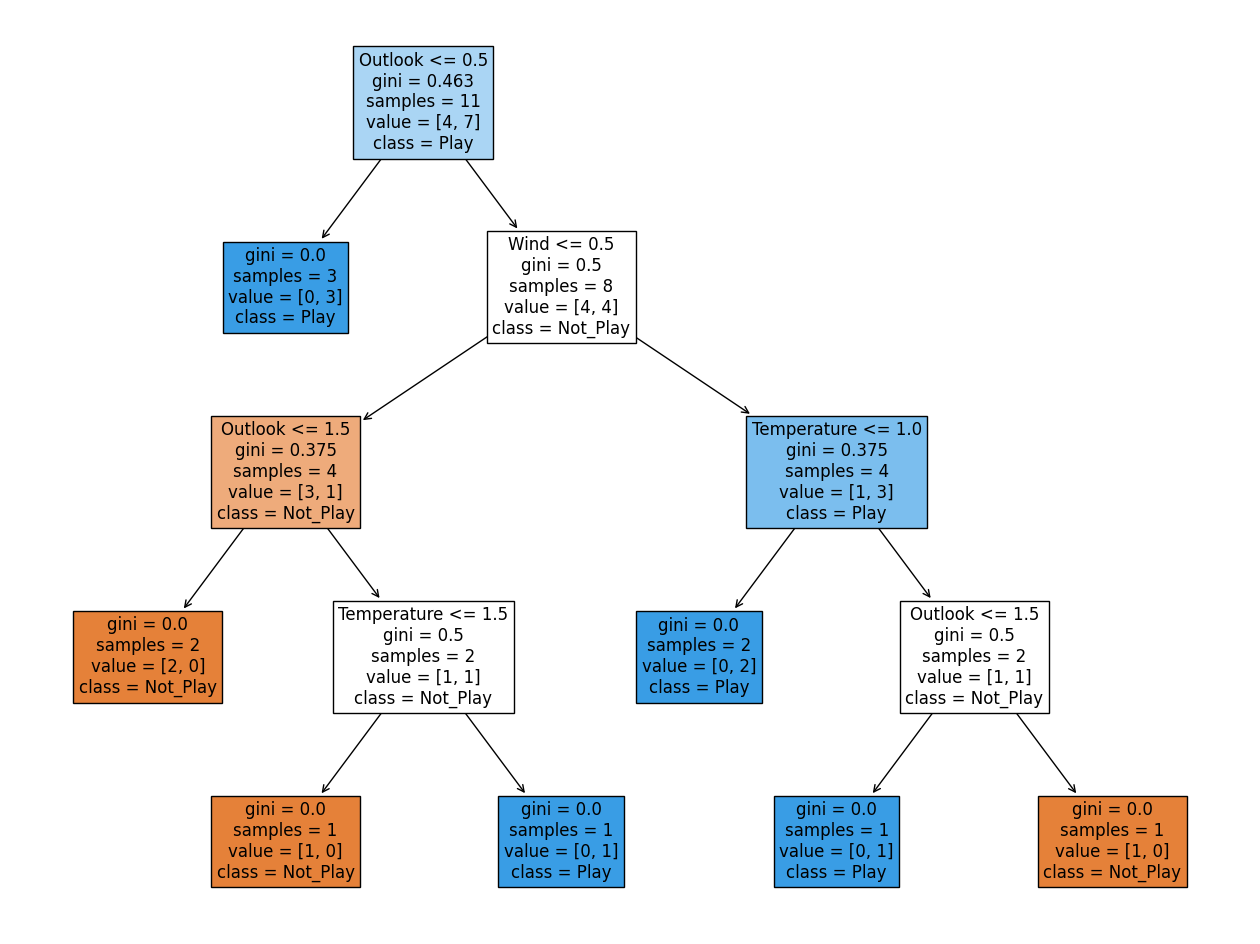

In [ ]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=X.columns, fontsize=12, filled=True,class_names=['Not_Play', 'Play'])

In [ ]:
feature_importances = dtree.feature_importances_

# Now, feature_importances contains the importance of each feature
# You can print or analyze this array to understand which features contribute most to the decision making
print("Feature importances:",feature_importances)

Feature importances: [0.50892857 0.29464286 0.         0.19642857]


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming dtree is your trained decision tree classifier and X, y are your feature matrix and target variable
# Replace dtree, X, and y with your actual trained classifier, feature matrix, and target variable

# Compute cross-validation scores (using 5-fold cross-validation as an example)
cv_scores = cross_val_score(dtree, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean Cross-validation score:", mean_cv_score)
print("Standard Deviation of Cross-validation scores:", std_cv_score)


Cross-validation scores: [0.66666667 0.66666667 0.66666667 0.66666667 0.5       ]
Mean Cross-validation score: 0.6333333333333333
Standard Deviation of Cross-validation scores: 0.06666666666666665
